In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read the Data

In [3]:
df=pd.read_csv("collegePlace.csv")

In [4]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


# Data Preparation

In [5]:
df.shape

(2966, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
# Statistical Descriptions of the numerical values in the dataset
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [8]:
# Getting to know the correlation between the target column and other features.
df.corr()['PlacedOrNot']

C:\Users\sai\AppData\Local\Temp\ipykernel_12740\607420542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['PlacedOrNot']


Age                  0.046943
Internships          0.179334
CGPA                 0.588648
Hostel              -0.038182
HistoryOfBacklogs   -0.022337
PlacedOrNot          1.000000
Name: PlacedOrNot, dtype: float64

# Preprocessing

In [9]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [10]:
# duplicate rows
print(df.duplicated().sum())
#drop duplicates
df.drop_duplicates(inplace=True)

1829


In [11]:
# Check if the duplicate rows are removed
print(df.duplicated().sum())

0


C:\Users\sai\AppData\Local\Temp\ipykernel_12740\2532903738.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


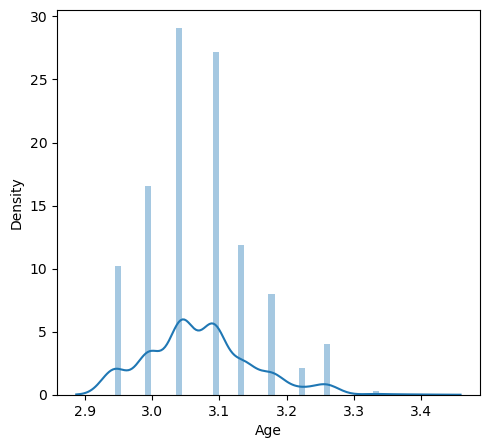

In [12]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(df['Age']))

In [13]:
df.replace({"Male":1,"Female":0})

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2946,23,1,Information Technology,1,7,1,1,0
2952,23,1,Mechanical,0,8,1,0,1
2954,23,0,Computer Science,1,8,0,1,1
2958,23,1,Computer Science,0,6,0,1,0


In [14]:

Stream = df[["Stream"]]

Stream = pd.get_dummies(Stream, drop_first = True)

Stream.head()

,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1


In [15]:
pre_train=pd.concat([df, Stream], axis = 1)

In [16]:
pre_train.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,Male,Electronics And Communication,1,8,1,1,1,0,0,1,0,0
1,21,Female,Computer Science,0,7,1,1,1,1,0,0,0,0
2,22,Female,Information Technology,1,6,0,0,1,0,0,0,1,0
3,21,Male,Information Technology,0,8,0,1,1,0,0,0,1,0
4,22,Male,Mechanical,0,8,1,0,1,0,0,0,0,1


In [17]:
tol_df=pre_train.drop(["Gender",'Stream'],axis=1)

In [18]:
tol_df

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,0,0
2,22,1,6,0,0,1,0,0,0,1,0
3,21,0,8,0,1,1,0,0,0,1,0
4,22,0,8,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2946,23,1,7,1,1,0,0,0,0,1,0
2952,23,0,8,1,0,1,0,0,0,0,1
2954,23,1,8,0,1,1,1,0,0,0,0
2958,23,0,6,0,1,0,1,0,0,0,0


In [19]:
tol_df

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,0,0
2,22,1,6,0,0,1,0,0,0,1,0
3,21,0,8,0,1,1,0,0,0,1,0
4,22,0,8,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2946,23,1,7,1,1,0,0,0,0,1,0
2952,23,0,8,1,0,1,0,0,0,0,1
2954,23,1,8,0,1,1,1,0,0,0,0
2958,23,0,6,0,1,0,1,0,0,0,0


# Univariate Analysis

C:\Users\sai\AppData\Local\Temp\ipykernel_12740\4279724344.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tol_df[['CGPA']],color='r')


<Axes: ylabel='Density'>

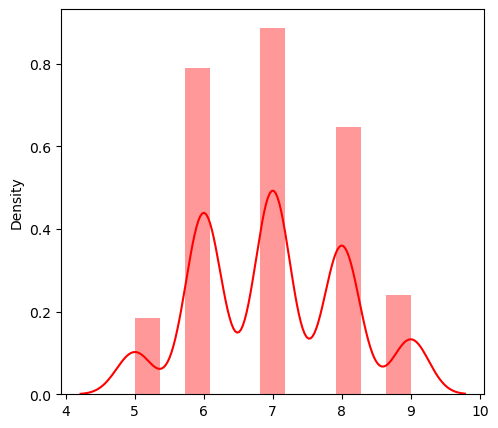

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(tol_df[['CGPA']],color='r')

C:\Users\sai\AppData\Local\Temp\ipykernel_12740\2168290868.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tol_df[['PlacedOrNot']],color='r')


<Axes: ylabel='Density'>

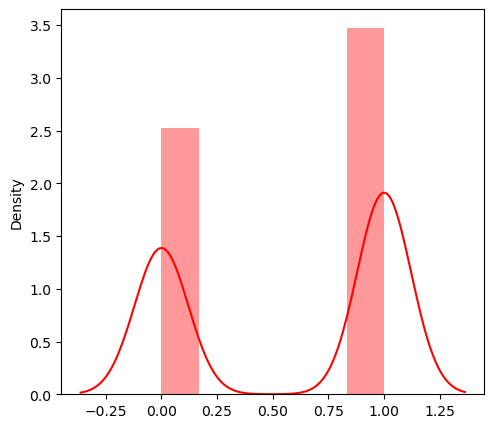

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(tol_df[['PlacedOrNot']],color='r')

# Bivariate Analysis

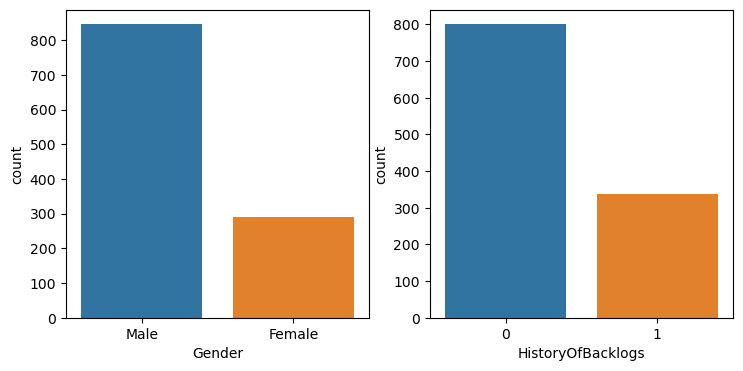

In [22]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x="Gender",data=df)
plt.subplot(1,4,2)
sns.countplot(x="HistoryOfBacklogs",data=df)
plt.show()

# Multivariate Analysis

<Axes: xlabel='PlacedOrNot', ylabel='count'>

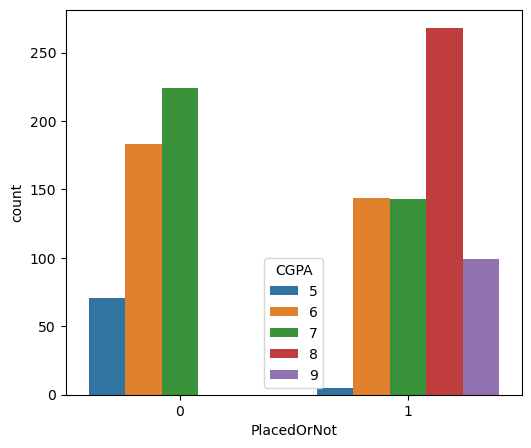

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=tol_df['PlacedOrNot'],hue=tol_df['CGPA'])

c:\Users\sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

c:\Users\sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


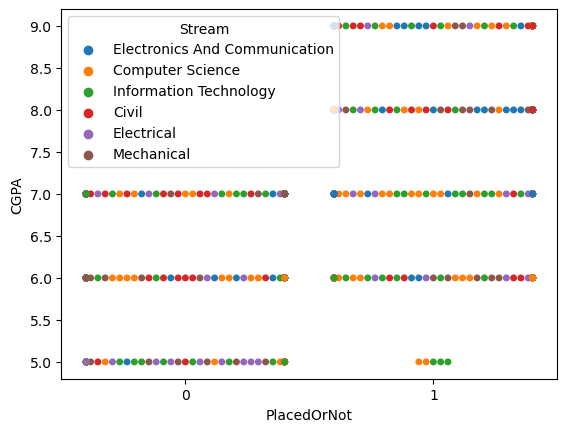

In [24]:
sns.swarmplot(x=tol_df['PlacedOrNot'],y=tol_df['CGPA'],hue=df['Stream'])

In [25]:
tol_df

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,0,0
2,22,1,6,0,0,1,0,0,0,1,0
3,21,0,8,0,1,1,0,0,0,1,0
4,22,0,8,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2946,23,1,7,1,1,0,0,0,0,1,0
2952,23,0,8,1,0,1,0,0,0,0,1
2954,23,1,8,0,1,1,1,0,0,0,0
2958,23,0,6,0,1,0,1,0,0,0,0


# Splotting the data into train and test

In [26]:
x=tol_df.drop(['PlacedOrNot'],axis=1)

In [27]:
x

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,0,0,1,0,0
1,21,0,7,1,1,1,0,0,0,0
2,22,1,6,0,0,0,0,0,1,0
3,21,0,8,0,1,0,0,0,1,0
4,22,0,8,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2946,23,1,7,1,1,0,0,0,1,0
2952,23,0,8,1,0,0,0,0,0,1
2954,23,1,8,0,1,1,0,0,0,0
2958,23,0,6,0,1,1,0,0,0,0


In [28]:
y=tol_df['PlacedOrNot']

In [29]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2946    0
2952    1
2954    1
2958    0
2960    0
Name: PlacedOrNot, Length: 1137, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=16)

In [31]:
x_train

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
363,21,0,8,0,1,1,0,0,0,0
1763,23,1,6,0,0,0,0,0,0,0
1948,20,0,7,0,1,0,0,0,1,0
1618,22,2,7,1,0,0,0,0,1,0
1780,22,1,7,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
827,21,0,7,0,0,0,0,0,1,0
1501,24,1,6,1,1,1,0,0,0,0
1309,26,1,6,0,1,0,0,0,0,0
142,24,3,7,0,0,0,0,0,1,0


In [32]:
y_train

363     1
1763    0
1948    1
1618    0
1780    0
       ..
827     1
1501    1
1309    1
142     1
1590    0
Name: PlacedOrNot, Length: 909, dtype: int64

In [33]:
x_test

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
1966,19,0,8,0,1,0,0,0,0,0
1591,24,0,6,0,0,0,0,0,1,0
108,24,1,7,0,1,0,0,0,0,0
2651,20,0,9,1,1,0,0,0,0,0
751,23,1,6,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
86,21,0,8,0,0,1,0,0,0,0
2173,20,0,9,1,1,1,0,0,0,0
2082,19,0,8,1,0,0,0,0,0,0
684,22,2,6,1,0,0,0,0,0,0


In [34]:
y_test

1966    1
1591    1
108     1
2651    1
751     0
       ..
86      1
2173    1
2082    1
684     1
2937    0
Name: PlacedOrNot, Length: 228, dtype: int64

# Model Building
# SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svm=SVC(kernel='linear')

In [37]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
pred_test=svm.predict(x_test)
pred_train=svm.predict(x_train)

In [39]:
train_accuracy=accuracy_score(pred_train,y_train)
test_accuracy=accuracy_score(pred_test,y_test)

In [40]:
print("accuracy on training data",train_accuracy)
print("accuracy on testing data",test_accuracy)

accuracy on training data 0.7370737073707371
accuracy on testing data 0.7105263157894737


# KNN

In [41]:
best_k=0
best_score=0
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train,y_train)
    knn_temp_predict=knn_temp.predict(x_test)
    score=accuracy_score(y_test,knn_temp_predict)*100
    if score>best_score and score<100:
        best_score=score
        best_k=k
print("k=",best_k)
print("accuracy=",best_score)

k= 21
accuracy= 79.82456140350878


# ANN

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import BinaryCrossentropy

In [43]:
classifier=Sequential()
classifier.add(Dense(10,activation='relu',input_dim=10))
classifier.add(Dropout(0.50))
classifier.add(Dense(16,activation='relu'))
classifier.add(Dropout(0.50))
classifier.add(Dense(1,activation='sigmoid'))

In [44]:
loss1=BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss1,metrics=['accuracy'])

In [45]:
classifier.fit(x_train,y_train,batch_size=20,epochs=100)

Epoch 1/100


46/46 [==============================] - 5s 5ms/step - loss: 0.8619 - accuracy: 0.5149
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.7768 - accuracy: 0.5138
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 0.7187 - accuracy: 0.5094
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.7025 - accuracy: 0.5171
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5391
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.6693 - accuracy: 0.5567
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.6622 - accuracy: 0.5567
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.5567
Epoch 9/100
46/46 [==============================] - 0s 6ms/step - loss: 0.6650 - accuracy: 0.5886
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.5677
Epoch 11/100
46/46 [=

## Model Selecting using Pickle

In [46]:
y_pred=classifier.predict(x_test)

8/8 [==============================] - 1s 3ms/step


In [47]:
y_preds=[]
for i in y_pred:
    if i >0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [48]:
y_preds

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0]

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69        92
           1       0.85      0.61      0.71       136

    accuracy                           0.70       228
   macro avg       0.72      0.72      0.70       228
weighted avg       0.74      0.70      0.70       228



In [50]:
model =KNeighborsClassifier(n_neighbors=31)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model.score(x_test,y_test)

0.7807017543859649

In [51]:
import pickle
with open('model_pickle_modified','wb') as f:
    pickle.dump(model,f)


In [52]:
with open('model_pickle_modified','rb') as f:
    mp=pickle.load(f)

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 70,  22],
       [ 28, 108]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

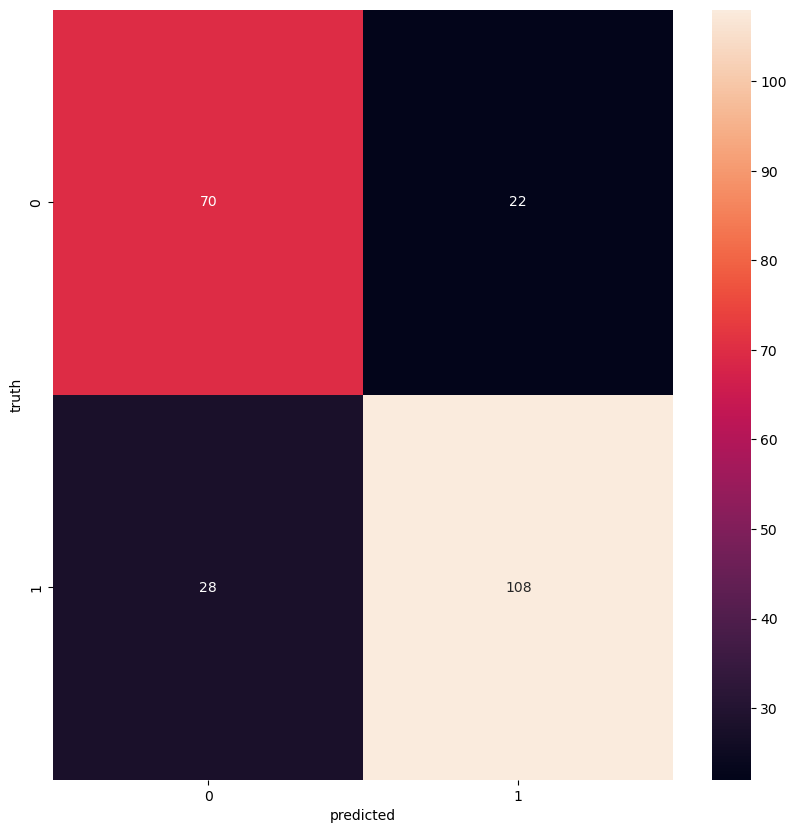

In [54]:
import seaborn as sb

plt.figure(figsize=(10,10))
sb.heatmap(cm,fmt='d',annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [55]:
x_test.columns

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')

In [56]:
df["Stream"].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [57]:
mp.predict(x_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [58]:
x_test


,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
1966,19,0,8,0,1,0,0,0,0,0
1591,24,0,6,0,0,0,0,0,1,0
108,24,1,7,0,1,0,0,0,0,0
2651,20,0,9,1,1,0,0,0,0,0
751,23,1,6,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
86,21,0,8,0,0,1,0,0,0,0
2173,20,0,9,1,1,1,0,0,0,0
2082,19,0,8,1,0,0,0,0,0,0
684,22,2,6,1,0,0,0,0,0,0
